In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image

# First Experiment

In [ ]:
pwd

In [ ]:
path_to_dataset =r'C:\Users\abdel\Desktop\Indoor-localization\dataset\TrainingData.csv'

df = pd.read_csv(path_to_dataset)

In [ ]:
df.head()

In [ ]:
columns = df.columns

AP = columns[:520]

In [ ]:
ap = df[AP]

In [ ]:
ap.head()

In [ ]:
def generate_image(record,shape=(100,100)):
    '''
        n_rep = number of repeated numbers for upsampling
    '''
    x, y = shape
    shape, = record.shape
    if x*y > shape:
        n_rep = int(x*y / shape)

        record = np.repeat(record, n_rep)
        shape, = record.shape
        
        remaining = np.zeros(x*y - shape)

        concat = np.concatenate((record,remaining))
        image = concat.reshape(x,y)
        return image
    else:
        print('Shape of record bigger than shape you pass to func.')

def normalize(x, maximum=1):
    return (x - x.min())/(x.max() - x.min()) * maximum

def handle_data(data):
    data = data.replace(100,0)
    data = data.apply(abs)
    return data

def pipline(data,shape=(100,100)):
    data = handle_data(data)
    data = normalize(data,maximum=255)
    data.fillna(0,inplace=True)

    images = []
    for i in data.iloc[:].values:
        im = generate_image(i,shape=shape)
        images.append(im)

    return np.asarray(images)

In [ ]:
images = pipline(data=ap.sample(200),shape=(100,100))

In [ ]:
from random import randint

num = randint(0,len(images)-1)
plt.imshow(images[num],cmap='hot', interpolation='nearest')

## Result: <font color='red'>Failed</font>

# Second Experiment

In [2]:
path = '/home/abdelrahman/Desktop/Dr. Mahdi/Indoor-localization/dataset/FINGERPRINTING_DB/'
ap_pos = pd.read_csv(path + 'AP_postions.csv', names=['ap_num','x','y','z','floor'])

X_test = pd.read_csv(path + 'Training_rss_21Aug17.csv', names=range(1, 993))
X_train = pd.read_csv(path + 'Test_rss_21Aug17.csv', names=range(1, 993))

y_test = pd.read_csv(path + 'Training_coordinates_21Aug17.csv', names=['x','y','z'])
y_train = pd.read_csv(path + 'Test_coordinates_21Aug17.csv', names=['x','y','z'])

### EDA

In [3]:
X_train.head()

1    2    3    4    5    6    7    8    9    10   ...  983  984  985  986  \
0  100  100  100  100  100  100  100  100  100  100  ...  100  100  100  100   
1  100  100  100  100  100  100  100  -64  100  -64  ...  100  100  100  100   
2  100  100  100  100  100  100  100  100  100  100  ...  100  100  100  100   
3  100  100  100  100  100  100  100  100  100  100  ...  100  100  100  100   
4  100  100  100  100  100  100  100  100  100  100  ...  100  100  100  100   

   987  988  989  990  991  992  
0  100  100  100  100  100  100  
1  100  100  100  100  100  100  
2  100  100  100  100  100  100  
3  100  100  100  100  100  100  
4  100  100  100  100  100  100  

[5 rows x 992 columns]

In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3951 entries, 0 to 3950
Columns: 992 entries, 1 to 992
dtypes: int64(992)
memory usage: 29.9 MB


In [5]:
y_train.head()

x       y     z
0  137.240  19.731   0.0
1   65.521  38.706  11.1
2  144.920  48.446   3.7
3  105.080  39.736   7.4
4  133.010  72.874   3.7

In [6]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3951 entries, 0 to 3950
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       3951 non-null   float64
 1   y       3951 non-null   float64
 2   z       3951 non-null   float64
dtypes: float64(3)
memory usage: 92.7 KB


In [7]:
ap_pos.head()

ap_num           x          y          z  floor
0       1   28.832665  34.540163  10.383756      3
1       2  182.260000  55.059000   0.000000      0
2       3  136.680000  33.388000   0.000000      0
3       4  146.232181  38.338983   0.021962      0
4       5  114.679907  73.678410   0.294848      0

In [8]:
ap_pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ap_num  992 non-null    int64  
 1   x       992 non-null    float64
 2   y       992 non-null    float64
 3   z       992 non-null    float64
 4   floor   992 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 38.9 KB


In [9]:
ap_pos

ap_num           x          y          z  floor
0         1   28.832665  34.540163  10.383756      3
1         2  182.260000  55.059000   0.000000      0
2         3  136.680000  33.388000   0.000000      0
3         4  146.232181  38.338983   0.021962      0
4         5  114.679907  73.678410   0.294848      0
..      ...         ...        ...        ...    ...
987     988   93.984369  39.172232   7.530846      2
988     989   46.493007  44.257397  11.037902      3
989     990   81.862500   7.224900   0.000000      0
990     991   63.371249  36.981317   3.485654      1
991     992   73.166861  38.088545   3.680285      1

[992 rows x 5 columns]

In [10]:
print('max x value: ', ap_pos.x.max())
print('min x value: ', ap_pos.x.min())

print('max y value: ', ap_pos.y.max())
print('min y value: ', ap_pos.y.min())

print('max z value: ', ap_pos.z.max())
print('min z value: ', ap_pos.z.min())

max x value:  213.4
min x value:  11.6001727716
max y value:  74.542
min y value:  2.4270271014
max z value:  14.8
min z value:  0.0


### Build Preprocessing Functions

**create_image:** used to creat numpy array with specific scale filled with zeros.

**scale:** used to scale values between 0 and 1.

**mapRss:** used to fill image with values to point the access points and it's RSS.

**showImag:** used to display image.

In [11]:
path_output = '/home/abdelrahman/Desktop/Dr. Mahdi/Indoor-localization/dataset/images/'

def scale(x):
    return (x - x.min())/(x.max() - x.min())

def create_image(x_scale, y_scale):
    print('Image for x, y')
    print('Shape is ',(x_scale, y_scale, 3))
    xy = np.zeros((x_scale, y_scale, 3))
    
    return xy

def mapRss(view1, x, y, x_scale, y_scale, rss):
    x = x * x_scale
    y = y * y_scale
    '''
        Green point means good signal
        Yellow point means normal signal
        red point means bad signal
        blue point means very weak signal
        gray point means not discovered
    '''
    if rss != 0 and rss <= .5:
        r = 0 
        g = 0 
        b = rss * 255
    elif rss > .5 and rss <= .75:
        r = rss * 255
        g = 0
        b = 0
    elif rss > .70 and rss <= .85:
        r = rss * 255 
        g = rss * 255
        b = 0
    elif rss > .85 and rss <= 1.:
        r = 0
        g = rss * 255 
        b = 0
    else:
        r = 10
        g = 10
        b = 10

    colors = np.asarray([r,g,b])
    x = int(round(x))
    y = int(round(y))
    
    view1[x-1][y-1] = colors

    # square around pixel
    #corners
    if r!=10 and b!=10 and g!=10:
        
        try:
            view1[x-1-1][y-1-1] = colors/2
        except:
            pass
        try:
            view1[x-1-2][y-1-2] = colors/4    
        except:
            pass

        try:
            view1[x-1+1][y-1+1] = colors/2
        except:
            pass
        try:
            view1[x-1+1][y-1-1] = colors/2
        except:
            pass
        try:
            view1[x-1-1][y-1+1] = colors/2
        except:
            pass
        try:
            view1[x-1+2][y-1+2] = colors/4
        except:
            pass
        try:
            view1[x-1+2][y-1-2] = colors/4
        except:
            pass
        try:
            view1[x-1-2][y-1+2] = colors/4
        except:
            pass
            
        # inner square points
        try:
            view1[x-1][y-1+1] = colors/2
        except:
            pass
        try:
            view1[x-1][y-1-1] = colors/2
        except:
            pass
        try:
            view1[x-1+1][y-1] = colors/2
        except:
            pass
        try:
            view1[x-1-1][y-1] = colors/2
        except:
            pass
        try:
            view1[x-1][y-1+2] = colors/4            
        except:
            pass
        try:
            view1[x-1][y-1-2] = colors/4
        except:
            pass
        try:
            view1[x-1+2][y-1] = colors/4
        except:
            pass
        try:
            view1[x-1-2][y-1] = colors/4
        except:
            pass
        try:
            view1[x-1+1][y-1-2] = colors/4
        except:
            pass
        try:
            view1[x-1+2][y-1-1] = colors/4
        except:
            pass
        try:
            view1[x-1-2][y-1-1] = colors/4
        except:
            pass
        try:
            view1[x-1-1][y-1+2] = colors/4
        except:
            pass
        try:
            view1[x-1-1][y-1-2] = colors/4
        except:
            pass
        try:
            view1[x-1+2][y-1+1] = colors/4
        except:
            pass
        try:
            view1[x-1-2][y-1+1] = colors/4
        except:
            pass
        try:
            view1[x-1+1][y-1+2] = colors/4
        except:
            pass
            
    print(f'r: {r}, g: {g}, b: {b}')

def showImage(array):
    img = Image.fromarray(array.astype('uint8'))
    plt.imshow(img, cmap='gist_rainbow')

def saveImage(array, name):
    img = Image.fromarray(array.astype('uint8'))
    img.save(f'{path_output}{name}.png')

### Experiments to test our functions

In [12]:
floor_0 = ap_pos[ap_pos['floor']==0]
floor_0.reset_index(inplace=True)
floor_0 = floor_0.apply(scale)

In [13]:
rss = X_train.T
len(rss)

992

In [14]:
rss

0     1     2     3     4     5     6     7     8     9     ...  3941  \
1     100   100   100   100   100   100   100   100   100   100  ...   100   
2     100   100   100   100   100   100   100   100   100   100  ...   100   
3     100   100   100   100   100   100   100   100   100   100  ...   100   
4     100   100   100   100   100   100   100   100   100   100  ...   100   
5     100   100   100   100   100   100   100   100   100   100  ...   100   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
988   100   100   100   100   100   100   100   100   100   100  ...   100   
989   100   100   100   100   100   100   100   100   100   100  ...   100   
990   100   100   100   100   100   100   100   100   100   100  ...   100   
991   100   100   100   100   100   100   100   100   100   100  ...   100   
992   100   100   100   100   100   100   100   100   100   100  ...   100   

     3942  3943  3944  3945  3946  3947  3948  3949  3950  
1     100   100   100   100   100   100   100   100   100  
2     100   100   100   100   100   100   100   100   100  
3     100   100   100   100   100   100   100   100   100  
4     100   100   100   100   100   100   100   100   100  
5     100   100   100   100   100   100   100   100   100  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...  
988   100   100   100   100   100   100   100   100   100  
989   -80   100   100   100   100   100   100   100   100  
990   100   100   100   100   100   100   100   100   100  
991   100   100   100   100   100   100   100   100   100  
992   100   100   100   100   100   100   100   100   100  

[992 rows x 3951 columns]

In [15]:
rss = rss.replace(100, 0)
rss = rss.apply(abs)
rss = rss.apply(scale)

In [16]:
y_train.apply(scale)

x         y     z
0     0.634498  0.493957  0.00
1     0.290308  0.669144  0.75
2     0.671355  0.759069  0.25
3     0.480157  0.678654  0.50
4     0.614197  0.984600  0.25
...        ...       ...   ...
3946  0.287467  0.672495  0.75
3947  0.339956  0.402146  0.25
3948  0.532324  0.705622  0.75
3949  0.351963  0.672856  0.75
3950  0.713060  0.698033  0.25

[3951 rows x 3 columns]

In [17]:
capture_pos = y_train.apply(scale).T

In [18]:
capture_pos

0         1         2         3         4         5         6     \
x  0.634498  0.290308  0.671355  0.480157  0.614197  0.348311  0.452514   
y  0.493957  0.669144  0.759069  0.678654  0.984600  0.796663  0.714826   
z  0.000000  0.750000  0.250000  0.500000  0.250000  0.250000  0.000000   

       7         8         9     ...      3941      3942      3943      3944  \
x  0.514951  0.574509  0.238651  ...  0.611222  0.175801  0.195842  0.349314   
y  0.724179  0.725028  0.546250  ...  0.892764  0.680860  0.662026  0.739413   
z  0.750000  0.750000  0.000000  ...  0.000000  0.500000  0.500000  0.500000   

       3945      3946      3947      3948      3949      3950  
x  0.320913  0.287467  0.339956  0.532324  0.351963  0.713060  
y  0.903290  0.672495  0.402146  0.705622  0.672856  0.698033  
z  0.750000  0.750000  0.250000  0.750000  0.750000  0.250000  

[3 rows x 3951 columns]

In [19]:
cap_x, cap_y, cap_z = capture_pos[0]

In [20]:
signal = rss[0]

In [21]:
signal.value_counts()

0
0.000000    949
0.791667      4
0.739583      4
0.708333      4
0.875000      3
0.770833      3
0.895833      3
0.833333      2
0.916667      2
0.885417      2
0.843750      2
0.854167      2
0.822917      2
0.927083      1
0.906250      1
0.989583      1
0.760417      1
0.864583      1
0.812500      1
0.750000      1
0.781250      1
1.000000      1
0.937500      1
Name: count, dtype: int64

In [22]:
x_scale = 100
y_scale = 100

xy = create_image(x_scale, y_scale)

Image for x, y
Shape is  (100, 100, 3)


In [23]:
xy.max()

0.0

In [24]:
for i in range(len(floor_0)):
    print(f'X: {floor_0.x[i]}, Y: {floor_0.y[i]}')
    mapRss(xy, floor_0.x[i], floor_0.y[i], x_scale, y_scale, signal.iloc[i])

X: 0.8447027587558169, Y: 0.7298341909190645
r: 10, g: 10, b: 10
X: 0.6173922816874207, Y: 0.4293279419536613
r: 10, g: 10, b: 10
X: 0.6650296421865846, Y: 0.4979819616350043
r: 10, g: 10, b: 10
X: 0.5076763624862156, Y: 0.9880248227616436
r: 10, g: 10, b: 10
X: 0.6773440577322478, Y: 0.5406919854469913
r: 10, g: 10, b: 10
X: 0.1753642144586321, Y: 0.47151948957135537
r: 10, g: 10, b: 10
X: 0.14417360596796439, Y: 0.448847409523583
r: 10, g: 10, b: 10
X: 0.18331821847732752, Y: 0.48000284325936426
r: 10, g: 10, b: 10
X: 0.15528582352968445, Y: 0.4514764504991177
r: 10, g: 10, b: 10
X: 0.11599540320303957, Y: 0.4393838162700764
r: 10, g: 10, b: 10
X: 0.13417458835393573, Y: 0.4402278275711079
r: 10, g: 10, b: 10
X: 0.11742063090108196, Y: 0.4381155100803395
r: 10, g: 10, b: 10
X: 0.12713040124127434, Y: 0.4423428623810698
r: 10, g: 10, b: 10
X: 0.17287194285159083, Y: 0.6465677116922995
r: 10, g: 10, b: 10
X: 0.16623550105164192, Y: 0.6502851911050277
r: 10, g: 10, b: 10
X: 0.1662253673

63.44977319278902 49.395732737529194


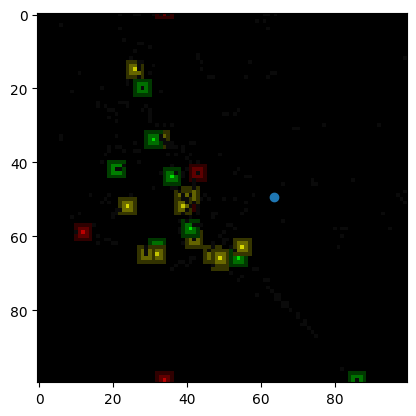

In [25]:
showImage(xy)
print(cap_x * x_scale,  cap_y * y_scale)
plt. scatter(cap_x * x_scale, cap_y * y_scale)

In [26]:
xy.max()

223.125

## Let's get organized after testing our functions

### first let's split floor's data

In [27]:
y_train['z'].value_counts()

z
0.0     1265
3.7     1108
7.4      770
11.1     699
14.8     109
Name: count, dtype: int64

In [28]:
ap_pos['floor'].value_counts()

floor
0    537
1    224
2    130
3     98
4      3
Name: count, dtype: int64

In [29]:
ap_floor_0 = ap_pos[ap_pos['floor'] == 0]
ap_floor_1 = ap_pos[ap_pos['floor'] == 1]
ap_floor_2 = ap_pos[ap_pos['floor'] == 2]
ap_floor_3 = ap_pos[ap_pos['floor'] == 3]
ap_floor_4 = ap_pos[ap_pos['floor'] == 4]

ap_floor_0.reset_index(inplace=True)
ap_floor_1.reset_index(inplace=True)
ap_floor_2.reset_index(inplace=True)
ap_floor_3.reset_index(inplace=True)
ap_floor_4.reset_index(inplace=True)

In [30]:
ap_floor_4

index  ap_num           x          y          z  floor
0    372     373  130.733148  70.244558  13.972309      4
1    536     537  101.979880  32.906571  14.798690      4
2    554     555   54.177000  28.952000  14.800000      4

In [31]:
y_train_floor0 = y_train[y_train['z'] == 0.0]
y_train_floor1 = y_train[y_train['z'] == 3.7]
y_train_floor2 = y_train[y_train['z'] == 7.4]
y_train_floor3 = y_train[y_train['z'] == 11.1]
y_train_floor4 = y_train[y_train['z'] == 14.8]

y_test_floor0 = y_test[y_test['z'] == 0.0]
y_test_floor1 = y_test[y_test['z'] == 3.7]
y_test_floor2 = y_test[y_test['z'] == 7.4]
y_test_floor3 = y_test[y_test['z'] == 11.1]
y_test_floor4 = y_test[y_test['z'] == 14.8]

In [32]:
train_floor_0 = y_train_floor0.index
train_floor_1 = y_train_floor1.index
train_floor_2 = y_train_floor2.index
train_floor_3 = y_train_floor3.index
train_floor_4 = y_train_floor4.index

test_floor_0 = y_test_floor0.index
test_floor_1 = y_test_floor1.index
test_floor_2 = y_test_floor2.index
test_floor_3 = y_test_floor3.index
test_floor_4 = y_test_floor4.index

In [33]:
X_train.reset_index(inplace=True)
X_test.reset_index(inplace=True)

In [34]:
rss_train_floor0 = X_train.loc[train_floor_0].reset_index().drop(['index', 'level_0'], axis=1).T
rss_train_floor1 = X_train.loc[train_floor_1].reset_index().drop(['index', 'level_0'], axis=1).T
rss_train_floor2 = X_train.loc[train_floor_2].reset_index().drop(['index', 'level_0'], axis=1).T
rss_train_floor3 = X_train.loc[train_floor_3].reset_index().drop(['index', 'level_0'], axis=1).T
rss_train_floor4 = X_train.loc[train_floor_4].reset_index().drop(['index', 'level_0'], axis=1).T

rss_test_floor0 = X_test.loc[test_floor_0].reset_index().drop(['index', 'level_0'], axis=1).T
rss_test_floor1 = X_test.loc[test_floor_1].reset_index().drop(['index', 'level_0'], axis=1).T
rss_test_floor2 = X_test.loc[test_floor_2].reset_index().drop(['index', 'level_0'], axis=1).T
rss_test_floor3 = X_test.loc[test_floor_3].reset_index().drop(['index', 'level_0'], axis=1).T
rss_test_floor4 = X_test.loc[test_floor_4].reset_index().drop(['index', 'level_0'], axis=1).T

In [35]:
rss_train_floor0

0     1     2     3     4     5     6     7     8     9     ...  1255  \
1     100   100   100   100   100   100   100   100   100   100  ...   100   
2     100   100   100   100   100   100   100   100   100   100  ...   100   
3     100   100   100   100   100   100   100   100   100   100  ...   100   
4     100   100   100   100   100   -86   100   100   100   100  ...   100   
5     100   100   100   100   100   100   100   100   100   100  ...   100   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
988   100   100   100   100   100   100   100   100   100   100  ...   100   
989   100   100   100   100   100   100   100   100   100   100  ...   100   
990   100   100   100   100   100   100   100   100   100   100  ...   100   
991   100   100   100   100   100   100   100   100   100   100  ...   100   
992   100   100   100   100   100   100   100   100   100   100  ...   100   

     1256  1257  1258  1259  1260  1261  1262  1263  1264  
1     100   100   100   100   100   100   100   100   100  
2     100   100   100   100   100   100   100   100   100  
3     100   100   100   100   100   100   100   100   100  
4     100   100   100   100   100   100   100   100   100  
5     100   100   100   100   100   100   100   100   100  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...  
988   100   100   100   100   100   100   100   100   100  
989   100   100   100   100   100   100   100   100   100  
990   100   100   100   100   100   100   100   100   100  
991   100   100   100   100   100   100   100   100   100  
992   100   100   100   100   100   100   100   100   100  

[992 rows x 1265 columns]

In [36]:
y_train_floor0.reset_index(inplace=True)
y_train_floor1.reset_index(inplace=True)
y_train_floor2.reset_index(inplace=True)
y_train_floor3.reset_index(inplace=True)
y_train_floor4.reset_index(inplace=True)

y_test_floor0.reset_index(inplace=True)
y_test_floor1.reset_index(inplace=True)
y_test_floor2.reset_index(inplace=True)
y_test_floor3.reset_index(inplace=True)
y_test_floor4.reset_index(inplace=True)

In [37]:
cap_pos_floor0_train = y_train_floor0.drop(['index'], axis=1).T
cap_pos_floor1_train = y_train_floor1.drop(['index'], axis=1).T
cap_pos_floor2_train = y_train_floor2.drop(['index'], axis=1).T
cap_pos_floor3_train = y_train_floor3.drop(['index'], axis=1).T
cap_pos_floor4_train = y_train_floor4.drop(['index'], axis=1).T

cap_pos_floor0_test = y_test_floor0.drop(['index'], axis=1).T
cap_pos_floor1_test = y_test_floor1.drop(['index'], axis=1).T
cap_pos_floor2_test = y_test_floor2.drop(['index'], axis=1).T
cap_pos_floor3_test = y_test_floor3.drop(['index'], axis=1).T
cap_pos_floor4_test = y_test_floor4.drop(['index'], axis=1).T

In [38]:
cap_pos_floor0_train

0       1       2     3       4       5        6       7       8     \
x  137.240  99.320  54.757  98.0  60.785  108.42  102.830  32.537  62.285   
y   19.731  43.654  25.395  22.0  37.472   35.73   24.792  22.111  20.269   
z    0.000   0.000   0.000   0.0   0.000    0.00    0.000   0.000   0.000   

     9     ...    1255     1256     1257    1258     1259     1260    1261  \
x  101.31  ...  31.965  120.670  102.000  61.241  152.650  135.340  89.312   
y   69.84  ...  22.190   39.333   68.333  20.859   22.335   73.292  34.267   
z    0.00  ...   0.000    0.000    0.000   0.000    0.000    0.000   0.000   

      1262    1263     1264  
x  123.360  47.000  132.390  
y   17.241  22.333   62.927  
z    0.000   0.000    0.000  

[3 rows x 1265 columns]

In [39]:
cap_pos_floor0_test

0       1        2        3       4        5       6        7    \
x  116.780  86.000  134.730  158.430  64.673  112.040  33.333  124.250   
y   40.823  26.667   28.324   22.019  16.190   44.542  21.000   28.372   
z    0.000   0.000    0.000    0.000   0.000    0.000   0.000    0.000   

      8       9    ...      216     217     218     219     220      221  \
x  62.479  78.602  ...  101.340  56.482  67.809  78.947  91.535  131.740   
y  13.605  33.407  ...   69.456  21.634  43.043  31.064  16.278   72.107   
z   0.000   0.000  ...    0.000   0.000   0.000   0.000   0.000    0.000   

       222      223      224     225  
x  103.310  119.020  110.020  89.333  
y   65.222   30.189   38.796  26.667  
z    0.000    0.000    0.000   0.000  

[3 rows x 226 columns]

In [40]:
cap_pos_floor0_train[0]

x    137.240
y     19.731
z      0.000
Name: 0, dtype: float64

In [41]:
# preprocessing
cap_pos_floor0_train = cap_pos_floor0_train.apply(scale)
cap_pos_floor1_train = cap_pos_floor1_train.apply(scale)
cap_pos_floor2_train = cap_pos_floor2_train.apply(scale)
cap_pos_floor3_train = cap_pos_floor3_train.apply(scale)
cap_pos_floor4_train = cap_pos_floor4_train.apply(scale)

cap_pos_floor0_test = cap_pos_floor0_test.apply(scale)
cap_pos_floor1_test = cap_pos_floor1_test.apply(scale)
cap_pos_floor2_test = cap_pos_floor2_test.apply(scale)
cap_pos_floor3_test = cap_pos_floor3_test.apply(scale)
cap_pos_floor4_test = cap_pos_floor4_test.apply(scale)


rss_train_floor0 = rss_train_floor0.replace(100, 0)
rss_train_floor0 = rss_train_floor0.apply(abs)
rss_train_floor0 = rss_train_floor0.apply(scale)
rss_train_floor1 = rss_train_floor0.replace(100, 0)
rss_train_floor1 = rss_train_floor0.apply(abs)
rss_train_floor1 = rss_train_floor0.apply(scale)
rss_train_floor2 = rss_train_floor0.replace(100, 0)
rss_train_floor2 = rss_train_floor0.apply(abs)
rss_train_floor2 = rss_train_floor0.apply(scale)
rss_train_floor3 = rss_train_floor0.replace(100, 0)
rss_train_floor3 = rss_train_floor0.apply(abs)
rss_train_floor3 = rss_train_floor0.apply(scale)
rss_train_floor4 = rss_train_floor0.replace(100, 0)
rss_train_floor4 = rss_train_floor0.apply(abs)
rss_train_floor4 = rss_train_floor0.apply(scale)


rss_test_floor0 = rss_test_floor0.replace(100, 0)
rss_test_floor0 = rss_test_floor0.apply(abs)
rss_test_floor0 = rss_test_floor0.apply(scale)
rss_test_floor1 = rss_test_floor0.replace(100, 0)
rss_test_floor1 = rss_test_floor0.apply(abs)
rss_test_floor1 = rss_test_floor0.apply(scale)
rss_test_floor2 = rss_test_floor0.replace(100, 0)
rss_test_floor2 = rss_test_floor0.apply(abs)
rss_test_floor2 = rss_test_floor0.apply(scale)
rss_test_floor3 = rss_test_floor0.replace(100, 0)
rss_test_floor3 = rss_test_floor0.apply(abs)
rss_test_floor3 = rss_test_floor0.apply(scale)
rss_test_floor4 = rss_test_floor0.replace(100, 0)
rss_test_floor4 = rss_test_floor0.apply(abs)
rss_test_floor4 = rss_test_floor0.apply(scale)


ap_floor_0 = ap_floor_0.apply(scale)
ap_floor_1 = ap_floor_1.apply(scale)
ap_floor_2 = ap_floor_2.apply(scale)
ap_floor_3 = ap_floor_3.apply(scale)
ap_floor_4 = ap_floor_4.apply(scale)

In [42]:
rss_train_floor0

0     1     2     3     4         5     6     7     8     9     ...  \
1     0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0  ...   
2     0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0  ...   
3     0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0  ...   
4     0.0   0.0   0.0   0.0   0.0  0.988506   0.0   0.0   0.0   0.0  ...   
5     0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0  ...   
..    ...   ...   ...   ...   ...       ...   ...   ...   ...   ...  ...   
988   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0  ...   
989   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0  ...   
990   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0  ...   
991   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0  ...   
992   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0  ...   

     1255  1256  1257  1258  1259  1260  1261  1262  1263  1264  
1     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
5     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
988   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
989   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
990   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
991   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
992   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[992 rows x 1265 columns]

In [ ]:
# Floor 0 Images
x_scale = 256
y_scale = 256
c = 0
for index in range(len(rss_train_floor0)): 
    signal = rss_train_floor0[index]
    image = create_image(x_scale, y_scale)
    for i in range(len(ap_floor_0)):
        print("------ Floor 0 ------")
        print(f'X: {ap_floor_0.x[i]}, Y: {ap_floor_0.y[i]}')
        x, y, z = cap_pos_floor0_train[i]
        print(f'X for capture position: {x}, Y for capture position: {y}')
        mapRss(image, ap_floor_0.x[i], ap_floor_0.y[i], x_scale, y_scale, signal.iloc[i])
        saveImage(image, f'floor_0image{c}')
    c+=1

Image for x, y
Shape is  (256, 256, 3)
------ Floor 0 ------
X: 0.8447027587558169, Y: 0.7298341909190645
X for capture position: 1.0, Y for capture position: 0.14377003788982803
r: 10, g: 10, b: 10
------ Floor 0 ------
X: 0.6173922816874207, Y: 0.4293279419536613
X for capture position: 1.0, Y for capture position: 0.4395287958115184
r: 10, g: 10, b: 10
------ Floor 0 ------
X: 0.6650296421865846, Y: 0.4979819616350043
X for capture position: 1.0, Y for capture position: 0.46377632083569226
r: 10, g: 10, b: 10
------ Floor 0 ------
X: 0.5076763624862156, Y: 0.9880248227616436
X for capture position: 1.0, Y for capture position: 0.22448979591836735
r: 10, g: 10, b: 10
------ Floor 0 ------
X: 0.6773440577322478, Y: 0.5406919854469913
X for capture position: 1.0, Y for capture position: 0.6164678785884676
r: 10, g: 10, b: 10
------ Floor 0 ------
X: 0.1753642144586321, Y: 0.47151948957135537
X for capture position: 1.0, Y for capture position: 0.32955174322080794
r: 10, g: 10, b: 10
--